<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/ry_LinearRegression_of_Gspc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Date
 1927-12-30      17.660000
 1928-01-03      17.760000
 1928-01-04      17.719999
 1928-01-05      17.549999
 1928-01-06      17.660000
                  ...     
 2021-06-07    4226.520020
 2021-06-08    4227.259766
 2021-06-09    4219.549805
 2021-06-10    4239.180176
 2021-06-11    4247.439941
 Name: Close, Length: 23473, dtype: float64, count    23473.000000
 mean       508.783665
 std        773.780039
 min          4.400000
 25%         24.020000
 50%         99.930000
 75%        873.640015
 max       4247.439941
 Name: Close, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7f8a22f26390>)

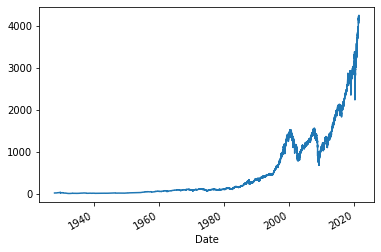

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader as pdr

xGspc= pdr.get_data_yahoo('^GSPC', start='1920')
X= xGspc['Close']
X, X.describe(), X.plot()


(count    23473.000000
 mean         7.025424
 std          2.610632
 min          2.137504
 25%          4.586164
 50%          6.642846
 75%          9.770895
 max         12.052378
 Name: Close, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8a249b2150>)

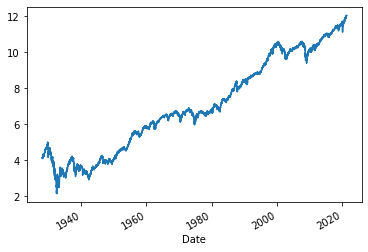

In [4]:
lX= np.log2(X)
lX.describe(), lX.plot()

In [5]:
import sklearn as sk#
from sklearn import linear_model

ryLm= sk.linear_model.LinearRegression()

x= np.arange(lX.size).reshape(-1,1)
y= lX.values
ryFit= ryLm.fit(x,y)
ryFit



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
yHat= ryLm.predict(x)
yHat

array([ 2.59708691,  2.59746424,  2.59784157, ..., 11.45300599,
       11.45338331, 11.45376064])

In [14]:
ryLm.coef_

array([0.00037733])

In [15]:
ryZ= pd.DataFrame()
ryZ['y']= y
ryZ['yHat']= yHat
ryZ

,y,yHat
0,4.142413,2.597087
1,4.150560,2.597464
2,4.147307,2.597842
3,4.133399,2.598219
4,4.142413,2.598596
...,...,...
23468,12.045255,11.452251
23469,12.045507,11.452629
23470,12.042873,11.453006
23471,12.049570,11.453383


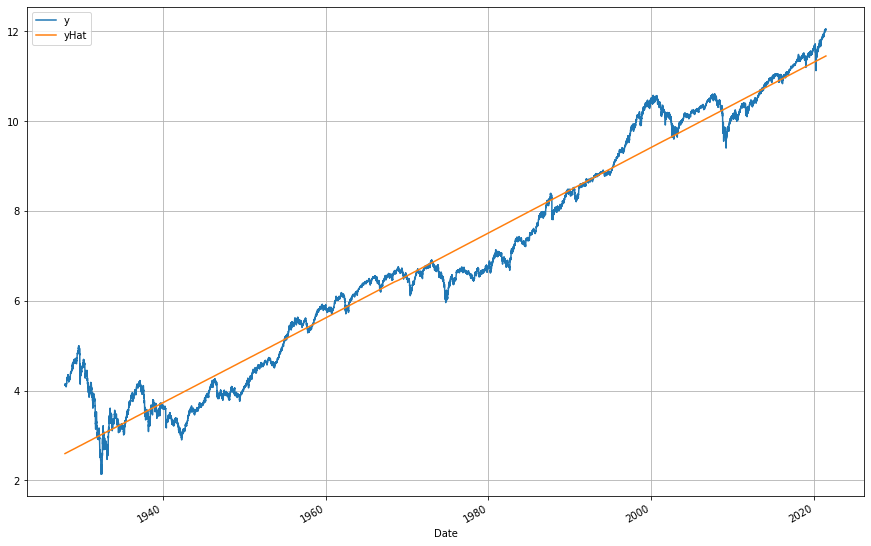

In [18]:
ryZ.index= lX.index
ryZ.plot(grid=True, figsize=(15,10))


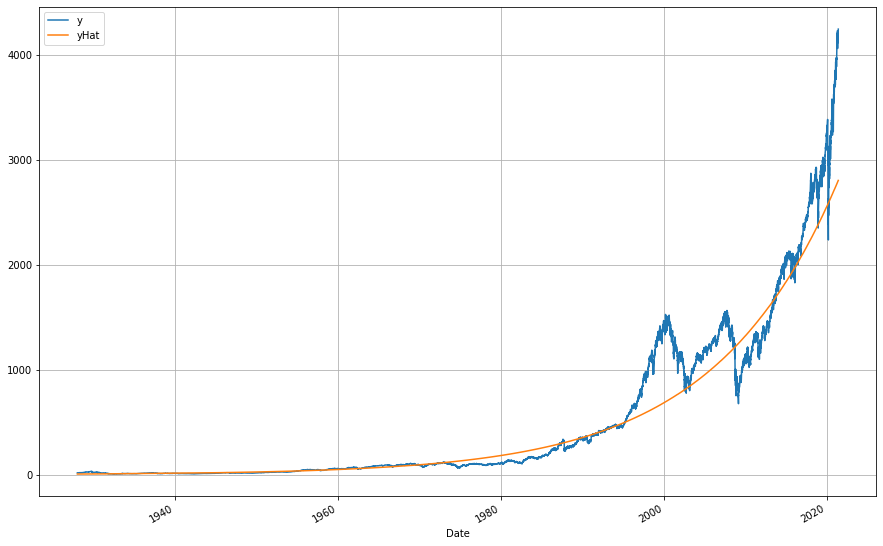

In [19]:
(2**ryZ).plot(grid=True, figsize=(15,10))